In [1]:
pixel_width = 0.7568361
slice_depth = 2.979
reference_slice = 25
m = 10.0 #mag
NA = 0.45 #N.A
fl = 21000 #focal length - assuming a 200mm tube lens
wl = 0.470
R = wl/(2*NA)
S = 60.0
A = 10.0

In [2]:
def blur_diameter(D):    
    return (S + R + 2*NA*m*fl*abs(D-fl)/D)/A

def blur_by_depth(stack):
    from scipy.ndimage.filters import gaussian_filter
    muscle_stack = list()
    for i in range(shape(stack)[0]):
        D = (i-reference_slice)*slice_depth + 21000
        b = blur_diameter(D)/pixel_width
        #print b
        muscle_stack.append(gaussian_filter(stack[i],b))
    #mstack = [gaussian_filter(stack[i],i/30.0 + 20.0)*wf(i) for i in range(shape(stack)[0])]
    #nstack = np.array([m/sum(m) for m in mstack])
    nstack = dstack(muscle_stack)
    print shape(nstack)
    #nstack[isnan(nstack)] = 0
    return nstack

#def blur_by_depth(stack):
#    from scipy.ndimage.filters import gaussian_filter
#    wf = lambda x: (1.0/(x+30))+1.0
#    mstack = [gaussian_filter(stack[i],(i/9.0)**2 + 3.0)*wf(i) for i in range(shape(stack)[0])]
    #nstack = np.array([m/sum(m) for m in mstack])
    #nstack[isnan(nstack)] = 0
#    return np.array(mstack)

def model_muscle(stack):
    mm = sum(blur_by_depth((stack>0).astype(float)),axis = 2)
    #mm = (np.sum(stack,axis = 0) >0).astype(float)
    return mm#/sum(mm)

filter_dict = dict()

filter_dict['b1'] = model_muscle(b1_stack)
filter_dict['b2'] = model_muscle(b2_stack)
filter_dict['b3'] = model_muscle(b3_stack)

filter_dict['i1'] = model_muscle(i1_stack)
filter_dict['i2'] = model_muscle(i2_stack)

filter_dict['iii1'] = model_muscle(iii1_stack)
filter_dict['iii3'] = model_muscle(iii3_stack)
filter_dict['iii24'] = model_muscle(iii24_stack)

filter_dict['hg1'] = model_muscle(hg1_stack)
filter_dict['hg2'] = model_muscle(hg2_stack)
filter_dict['hg3'] = model_muscle(hg3_stack)
filter_dict['hg4'] = model_muscle(hg4_stack)

filter_dict['tpd'] = model_muscle(tpd_stack)
filter_dict['tpv'] = model_muscle(tpv_stack)

filter_dict['ttm'] = model_muscle(ttm_stack)
filter_dict['pr'] = model_muscle(pr_stack)

NameError: name 'b1_stack' is not defined

$X$ is an matrix of $m$ pixels by $n$ frames constructed from the signals from $k$ muscles so that:
$X = WB$ where $W$ is a $m$ by $k$ mixing matrix and $B$ is a $k$ by $n$ matrix of muscle fluorescence over time. We find the best fit to $B$ as $W^\dagger X = B$.

In [ ]:
def construct_model(filter_dict,
                    genotype_descriptor,
                    add_bk = True):
    mlist = [filter_dict[key] for key in genotype_descriptor]   
    if add_bk:
        bk_mask = np.array([muscle_masks[mkey] for mkey in genotype_descriptor])
        bk_mask = sum(bk_mask,axis = 0)>0
        from scipy.ndimage.filters import gaussian_filter
        bk = gaussian_filter(bk_mask.astype(float),50)
        mlist.append(bk)
    import cv2
    model_mtrx = [cv2.pyrDown(cv2.pyrDown(ar)) for ar in mlist]
    W = np.array([m.ravel() for m in model_mtrx]).T
    return W

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42 #allows text in saved .pdf files to be edited in illustrator
recalc_meds = True #recalculate the groupwise median stats set to False to load from file

Populating the interactive namespace from numpy and matplotlib


In [48]:
A = [1,1,0,0]
B = [1,0,1,0]
C = [1,1,1,0]
D = [1,1,0,0]
E = [1,0,1,1]
F = [1,0,0,0]

In [77]:
M = np.vstack([A,B,C,D,E]).T
M = np.vstack([F,A,A,F,A]).T

In [78]:
G = np.dot(M.T,M)

In [79]:
M

array([[1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [80]:
M.T

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 0]])

In [81]:
G

array([[1, 1, 1, 1, 1],
       [1, 2, 2, 1, 2],
       [1, 2, 2, 1, 2],
       [1, 1, 1, 1, 1],
       [1, 2, 2, 1, 2]])

In [82]:
vals,vects = np.linalg.eig(G)

In [83]:
shape(vals)

(5,)

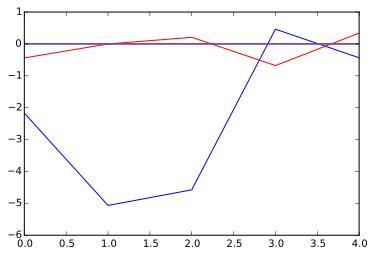

In [84]:
plot(vects[0]*vals[0])
plot(vects[1]*vals[1])
plot(vects[2]*vals[2])
plot(vects[3]*vals[3])
plot(vects[4]*vals[4])

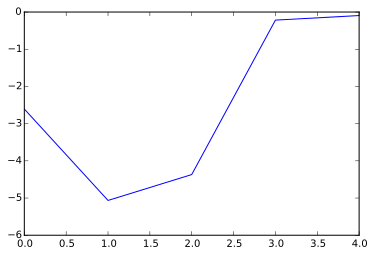

In [85]:
plot(dot(vals.T,vects))
#plot(vects[0]*vals[0])